In [1]:
"""
make energy deposit plot in TOF
@aurthor Jiancheng Zeng
@Nov 20 2021
"""

'\nmake energy deposit plot in TOF\n@aurthor Jiancheng Zeng\n@Nov 20 2021\n'

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statistics
import time
from numpy import array
import pandas as pd
import math
from matplotlib.pyplot import figure
from mpl_toolkits import mplot3d
import random
import scipy
pd.set_option('display.float_format', lambda x: '%0.4f' % x)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
"""
Vector title: [0]Event number/[1]energy deposit on the outer TOF/[2]energy deposit on the inner TOF/[3]time in between TOF/[4]angle in between TOF/[5]distance in between TOF/[6]distance travel inside LArTPC/[7]penetration depth on z/[8]distance on the side/[9]initial energy/[10]event type
"""

anti_proton_Old = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/TOF/ORI_Stop_anti_proton_1e9_Ene_0_500_vector.txt", delimiter = ' '))
anti_deuteron_Old = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/TOF/ORI_Stop_anti_deuteron_5e7_Ene_0_600_vector.txt", delimiter = ' '))
anti_He3_Old = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/TOF/ORI_Stop_anti_He3_1e9_Ene_0_1500_vector.txt", delimiter = ' '))

print("finish reading data!")

finish reading data!


In [4]:
print(len(anti_proton_Old))

1617005


In [5]:
sigma = 0.16    #energy resolution percentage
deltaT = 0.5    #timing resolution/ns

anti_proton = anti_proton_Old[anti_proton_Old[:, 10] == 1]
anti_He3 = anti_He3_Old[anti_He3_Old[:, 10] == 1]
time_pbar_err = []
dEOut_pbar_err = []
dEIn_pbar_err = []

time_He3bar_err = []
dEOut_He3bar_err = []
dEIn_He3bar_err = []

for i in range(max(len(anti_proton[:, 3]), len(anti_He3[:, 3]))):
    if(i<len(anti_proton[:, 3])):
        dEOut_pbar_err.append(random.gauss(anti_proton[i, 1], sigma * anti_proton[i, 1]))
        dEIn_pbar_err.append(random.gauss(anti_proton[i, 2], sigma * anti_proton[i, 2]))
        time_pbar_err.append(anti_proton[i, 3] + deltaT * 2 * (random.random() - 0.5))
    if(i<len(anti_He3[:, 3])):
        dEOut_He3bar_err.append(random.gauss(anti_He3[i, 1], sigma * anti_He3[i, 1]))
        dEIn_He3bar_err.append(random.gauss(anti_He3[i, 2], sigma * anti_He3[i, 2]))
        time_He3bar_err.append(anti_He3[i, 3] + deltaT * 2 * (random.random() - 0.5))
    print("applying error:"+str(int(100*i/max(len(anti_proton[:, 3]), len(anti_He3[:, 3]))))+"%", end='\r')
    
time_pbar_err = np.array(time_pbar_err)
dEOut_pbar_err = np.array(dEOut_pbar_err)
dEIn_pbar_err = np.array(dEIn_pbar_err)

time_He3bar_err = np.array(time_He3bar_err)
dEOut_He3bar_err = np.array(dEOut_He3bar_err)
dEIn_He3bar_err = np.array(dEIn_He3bar_err)
print("Finished processing!")

Finished processing!


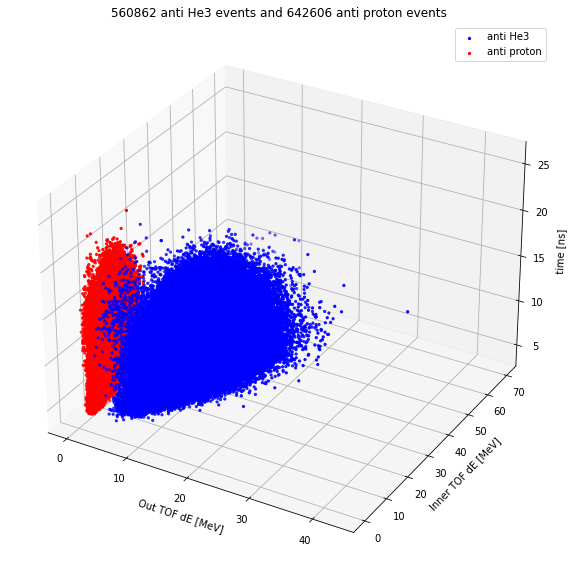

In [6]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

ax.scatter3D(dEOut_He3bar_err, dEIn_He3bar_err, time_He3bar_err, marker = '.', color = 'b', label = 'anti He3')
ax.scatter3D(dEOut_pbar_err, dEIn_pbar_err, time_pbar_err, marker = '.', color = 'r', label = 'anti proton')

ax.set_xlabel("Out TOF dE [MeV]")
ax.set_ylabel('Inner TOF dE [MeV]')
ax.set_zlabel('time [ns]')
plt.legend()
plt.title("%d anti He3 events and %d anti proton events"%(len(anti_He3[:, 2]), len(anti_proton[:, 2])))
plt.savefig("./TOF3D.jpg")
plt.show()


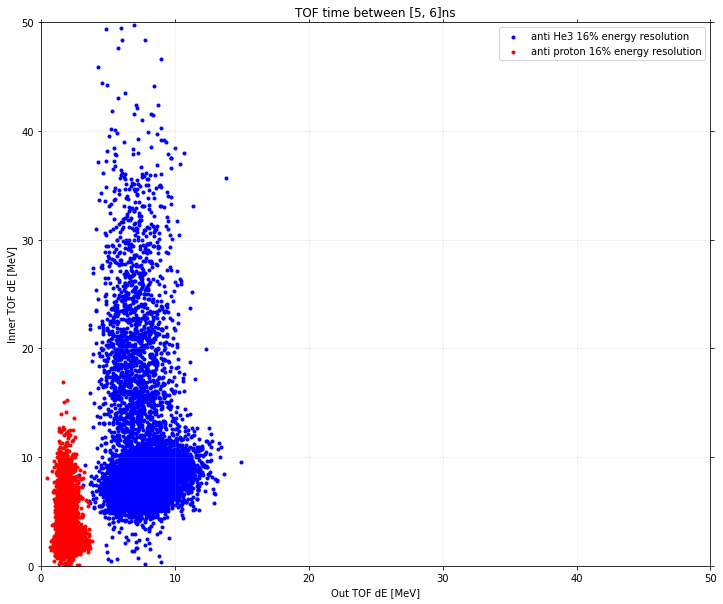

7868


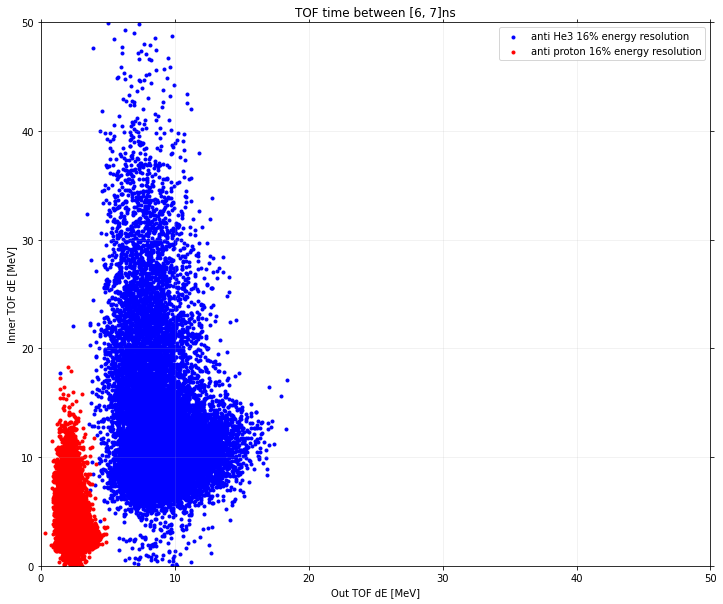

18749


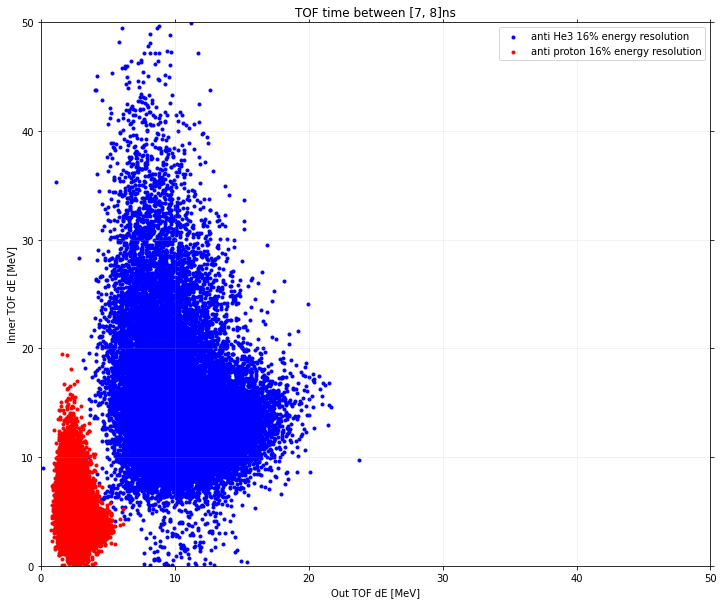

28152


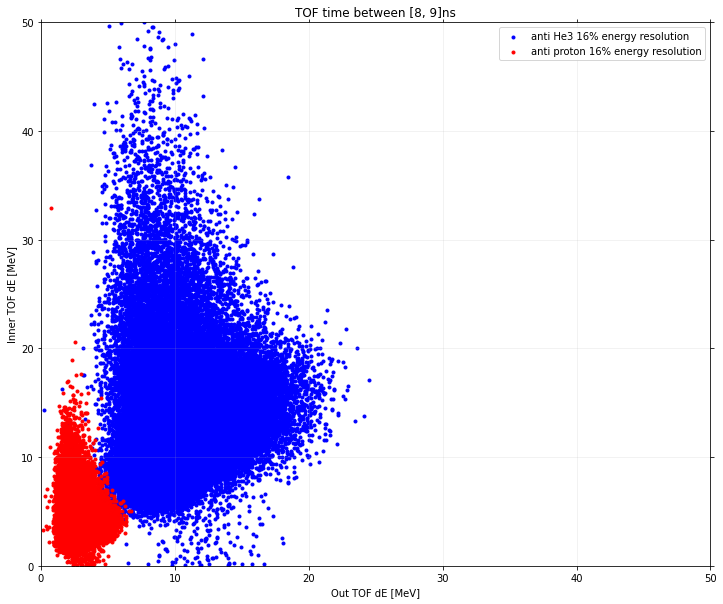

49543


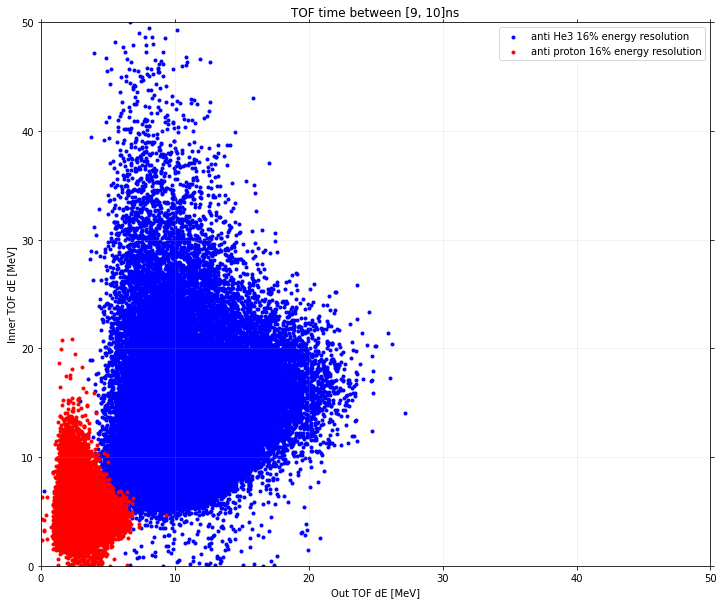

89632


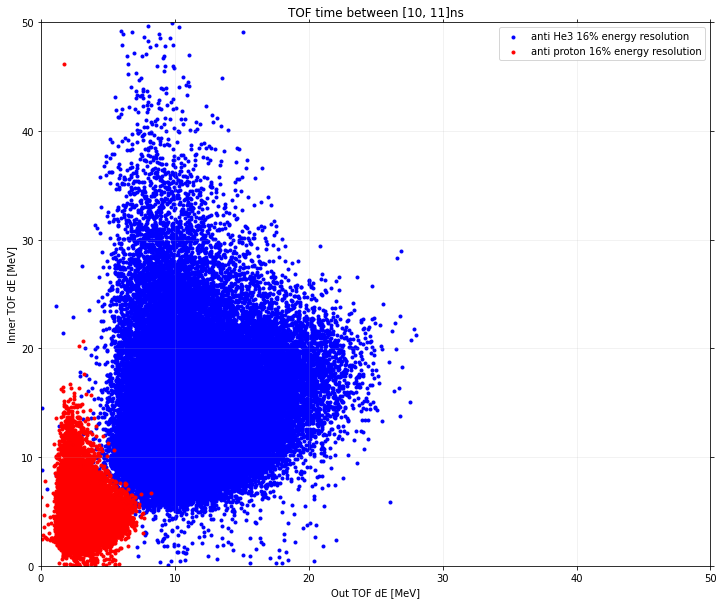

104342


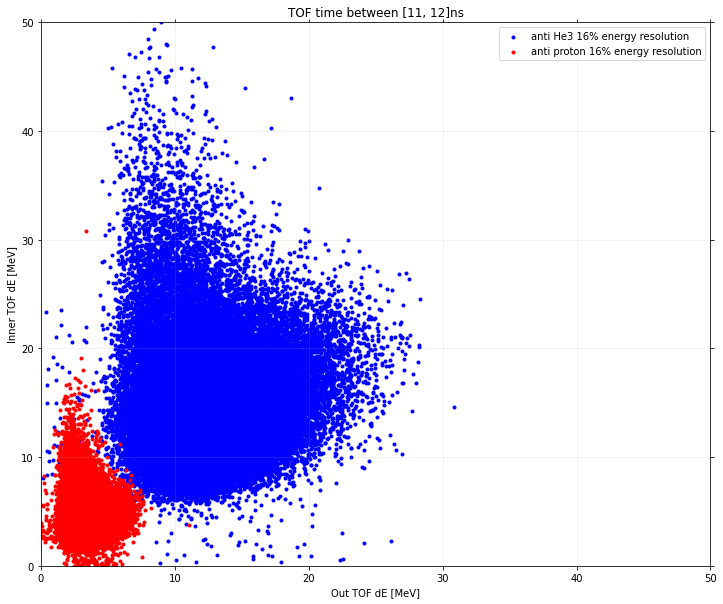

97336


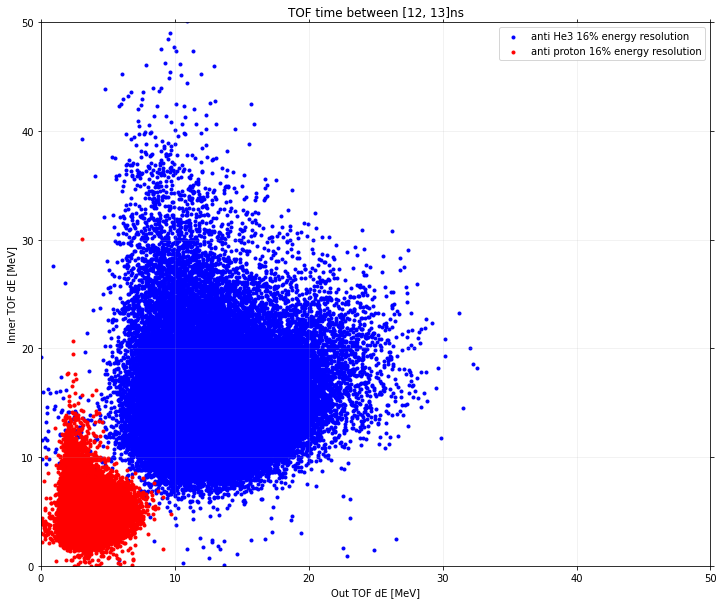

70359


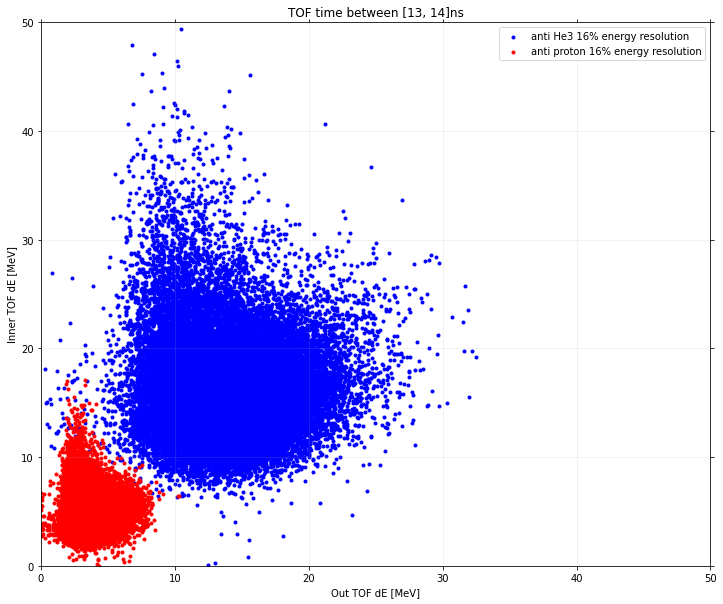

44104


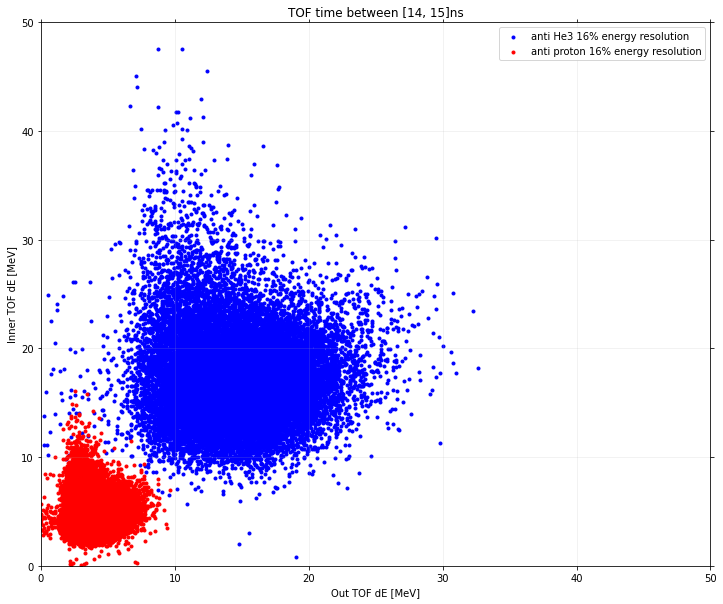

25449


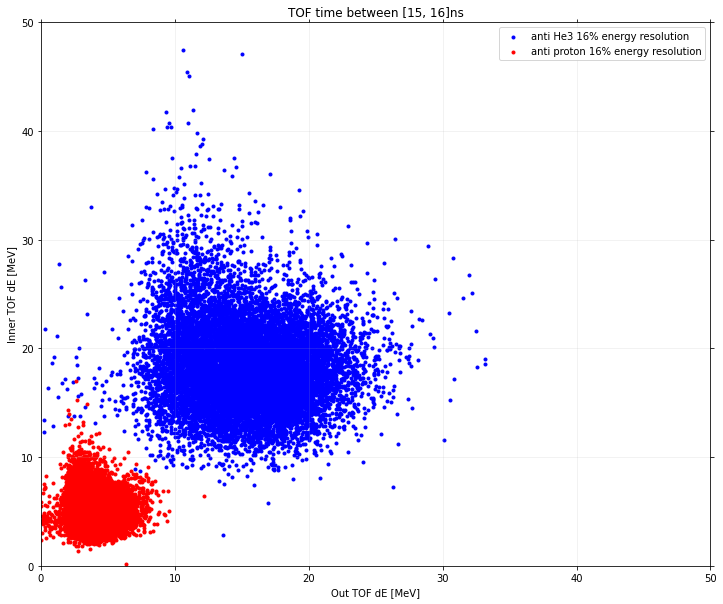

13701


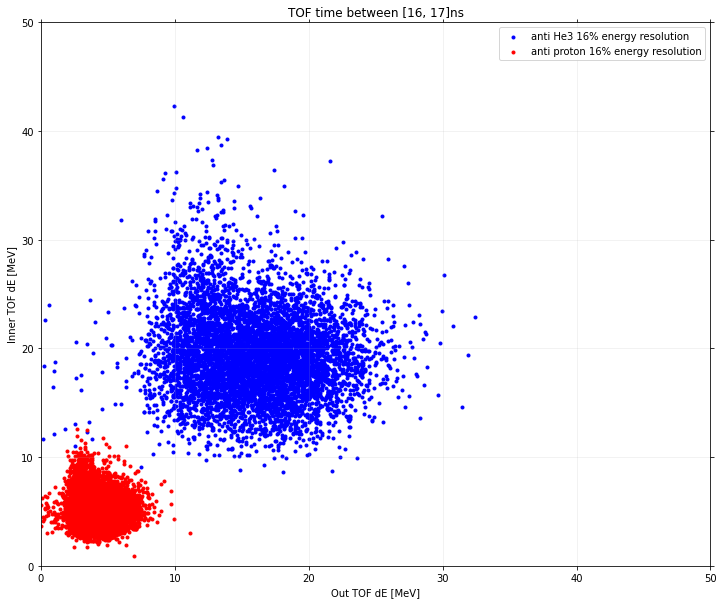

6670


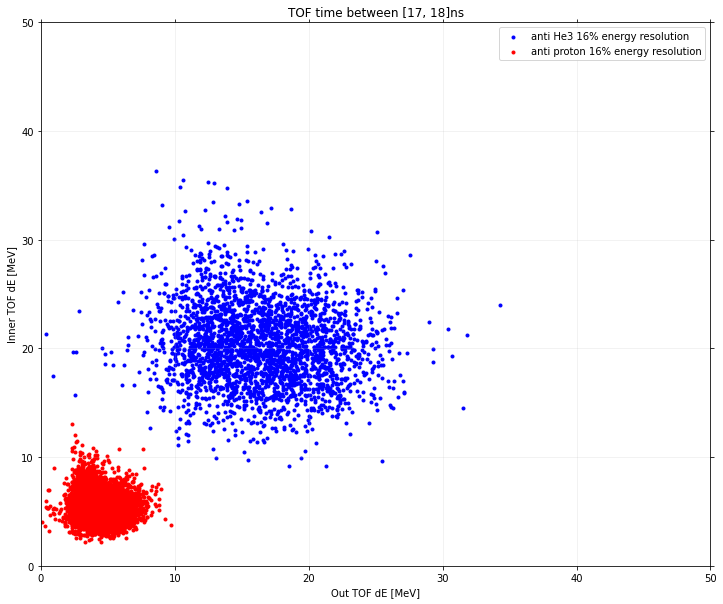

2836


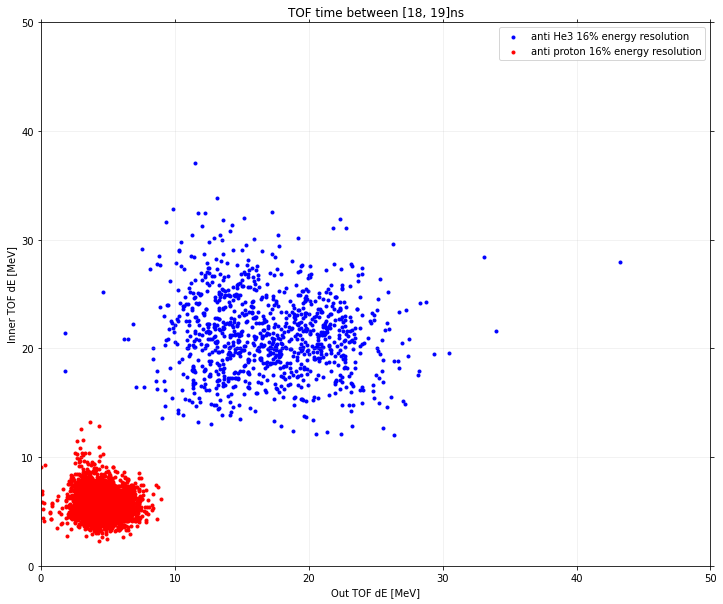

1005


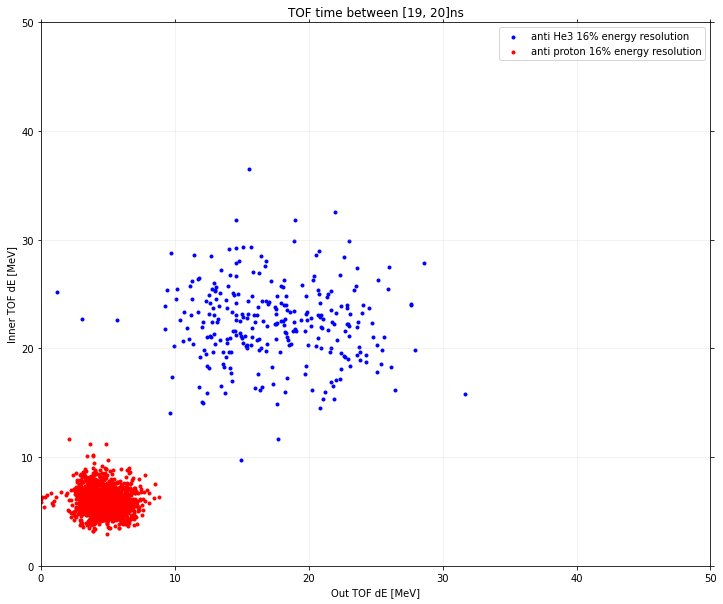

284


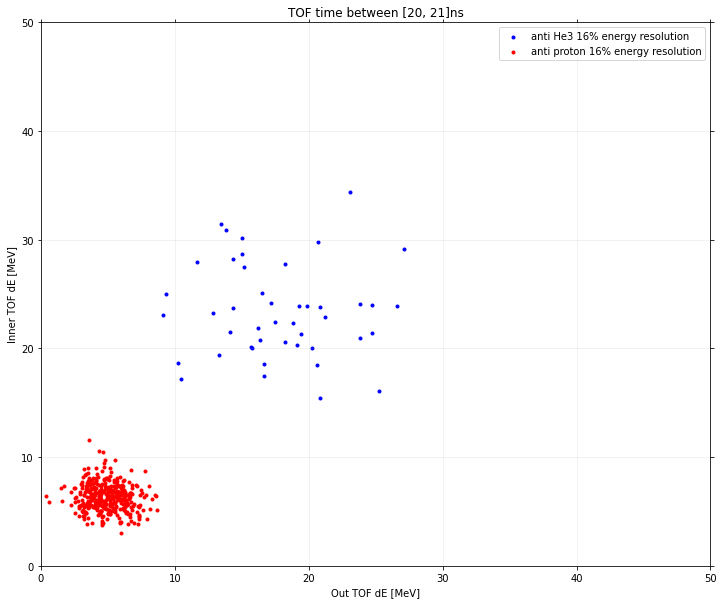

45


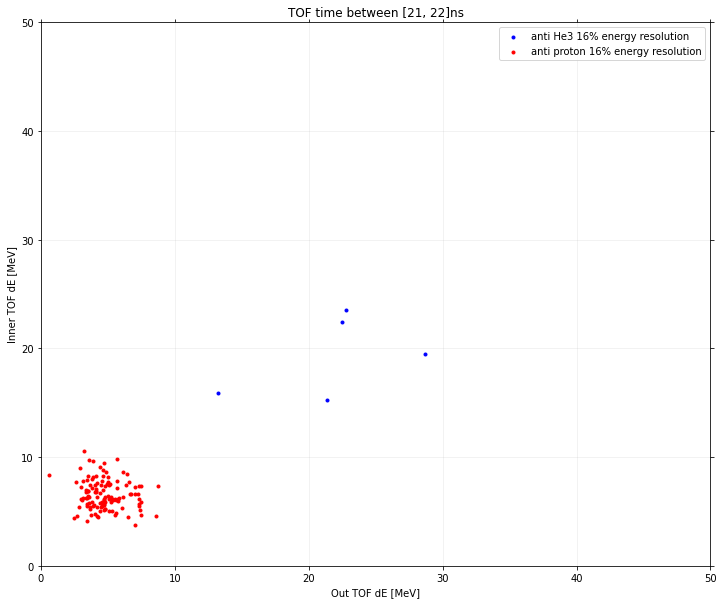

5


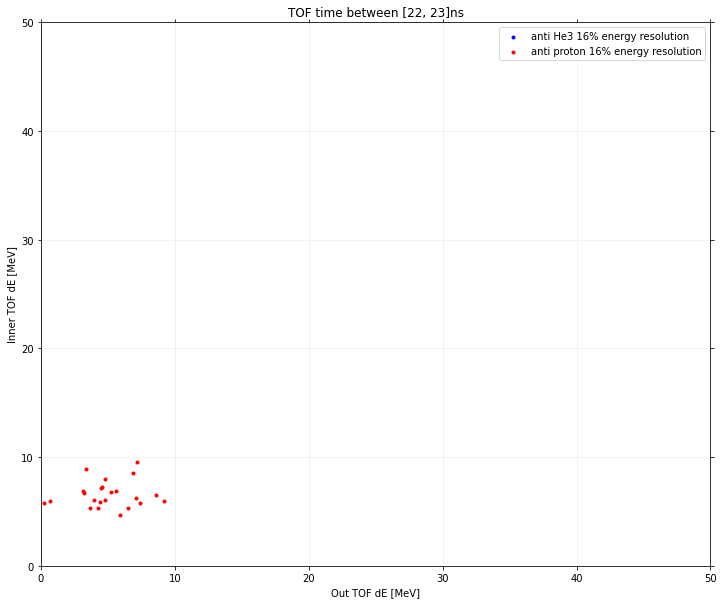

0


In [7]:
start_time = 5
#matplotlib.rcParams.update({'font.size': 30})
for n in range(18):
    fig = plt.figure(figsize=(12,10))
    plt.cla()
    plt.scatter(dEOut_He3bar_err[np.logical_and(time_He3bar_err >start_time+n, time_He3bar_err <start_time + 1 +n)], dEIn_He3bar_err[np.logical_and(time_He3bar_err >start_time+n, time_He3bar_err <start_time + 1 +n)], label = "anti He3 %d%% energy resolution"%(100*sigma), marker = '.', color = 'b')
    plt.scatter(dEOut_pbar_err[np.logical_and(time_pbar_err > start_time+n, time_pbar_err < start_time + 1 +n)] , dEIn_pbar_err[np.logical_and(time_pbar_err >start_time+n, time_pbar_err <start_time + 1 +n)], label = "anti proton %d%% energy resolution"%(100*sigma), marker = '.', color = 'r')
    #plt.scatter(dEOut_dbar_err[np.logical_and(time_dbar_err>start_time+n, time_dbar_err<start_time + 1 +n)], dEIn_dbar_err[np.logical_and(time_dbar_err>start_time+n, time_dbar_err<start_time + 1 +n)], label = "anti deuteron 45 degree", marker = '.', color = 'lightcoral')
    plt.grid(alpha = 0.2)
    plt.legend()
    plt.title("TOF time between [{}".format(start_time+n)+", {}".format(start_time + 1 +n)+"]ns")
    plt.xlabel('Out TOF dE [MeV]')
    plt.ylabel('Inner TOF dE [MeV]')
    plt.xlim([0, 50])
    plt.ylim([0, 50])
    plt.show()
    print(len(dEOut_He3bar_err[np.logical_and(time_He3bar_err >start_time+n, time_He3bar_err <start_time + 1 +n)]))
    time.sleep(1)

In [8]:
print(float(1==1))

1.0


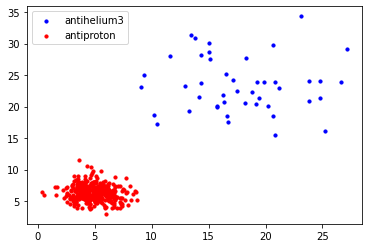

In [9]:
"""
prepare for logistic-regression
"""

data_anti_proton = pd.DataFrame.transpose(pd.DataFrame([dEOut_pbar_err[np.logical_and(time_pbar_err > 20, time_pbar_err < 21)], dEIn_pbar_err[np.logical_and(time_pbar_err > 20, time_pbar_err < 21)], [0]*len(dEOut_pbar_err[np.logical_and(time_pbar_err > 20, time_pbar_err < 21)])]))
data_anti_He3 = pd.DataFrame.transpose(pd.DataFrame([dEOut_He3bar_err[np.logical_and(time_He3bar_err > 20, time_He3bar_err < 21)], dEIn_He3bar_err[np.logical_and(time_He3bar_err > 20, time_He3bar_err < 21)], [1]*len(dEOut_He3bar_err[np.logical_and(time_He3bar_err > 20, time_He3bar_err < 21)])]))
data = data_anti_proton.append(data_anti_He3, ignore_index=True)

# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

# filter out the applicants that is antihelium3
L_anti_He3 = data.loc[y == 1]

# filter out the applicants that is antiproton
L_anti_proton = data.loc[y == 0]

# plots
plt.scatter(L_anti_He3.iloc[:, 0], L_anti_He3.iloc[:, 1], color = 'b', s=10, label='antihelium3')
plt.scatter(L_anti_proton.iloc[:, 0], L_anti_proton.iloc[:, 1], color = 'r', s=10, label='antiproton')
plt.legend()
plt.show()

In [10]:
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

/var/folders/jy/kzbmcbld7cxb685lxm7tb8p80000gn/T/ipykernel_48841/1508163299.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


In [11]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

def cost_function(self, theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    h = probability(theta, x)
    #h = np.reshape(h, (h.shape[0], 1))
    total_cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return total_cost

def gradient(self, theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta, x)) - y)

def fit(x, y, theta):
    opt_weights = scipy.optimize.fmin_tnc(func=cost_function, x0=theta, fprime=gradient,args=(theta, x, y.flatten()))
    return opt_weights[0]

parameters = fit(X, y, theta)

tnc: User requested end of minimization


ValueError: tnc: invalid gradient vector from minimized function.

In [ ]:
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

In [ ]:
start_time = 5
low_limit = 10
high_limit = 11
events_kept = 0

#matplotlib.rcParams.update({'font.size': 30})
for n in range(18):
    fig = plt.figure(figsize=(12,10))
    N_x = []
    N_y = []
    He3bar_cut_x = []
    He3bar_cut_y = []
    plt.cla()
    cut_min_x = np.max(dEOut_pbar_err[np.logical_and(time_pbar_err>start_time+n, time_pbar_err<start_time+n+1)]) 
    cut_min_y = np.max(dEIn_pbar_err[np.logical_and(time_pbar_err>start_time+n, time_pbar_err<start_time+n+1)])
    He3bar_cut_x = dEOut_He3bar_err[np.logical_and(time_He3bar_err>start_time+n, time_He3bar_err<start_time+n+1)]
    He3bar_cut_y = dEIn_He3bar_err[np.logical_and(time_He3bar_err>start_time+n, time_He3bar_err<start_time+n+1)]
    N_x = He3bar_cut_x[np.logical_not(np.logical_and(He3bar_cut_x<cut_min_x, He3bar_cut_y<cut_min_y))]
    N_y = He3bar_cut_y[np.logical_not(np.logical_and(He3bar_cut_x<cut_min_x, He3bar_cut_y<cut_min_y))]
    plt.scatter(N_x, N_y, marker = '.', color = 'b', label = '%d anti He3 events'%len(N_y))
    plt.grid(alpha = 0.2)
    plt.xlabel('Out TOF dE [MeV]')
    plt.ylabel('Inner TOF dE [MeV]')
    plt.title("TOF time between [{}".format(start_time+n)+", {}".format(start_time + 1 +n)+"]ns")
    plt.legend()
    plt.xlim([0, 30])
    plt.ylim([0, 50])
    plt.show()
    events_kept = events_kept + len(N_y)
    print("Outer TOF cut:"+str(cut_min_x))
    print("Inner TOF cut:"+str(cut_min_y))
    print("antiproton number:"+str(len(dEOut_pbar_err[np.logical_and(time_pbar_err >start_time+n, time_pbar_err <start_time + 1 +n)])))
    print("antiHe3 number:"+str(len(dEOut_He3bar_err[np.logical_and(time_He3bar_err >start_time+n, time_He3bar_err <start_time + 1 +n)])))
    print("cut efficiency:"+str(len(N_x)/(len(He3bar_cut_x)+1)))
    
print("Finished!\n %d anti He3 events been kept"%events_kept)
print("Average cut efficiency = %d%%"%(100*events_kept/len(anti_He3[:, 2])))

In [ ]:
print(len(anti_He3_Old[anti_He3_Old[:, 10]==1]))
print(len(anti_He3_Old[anti_He3_Old[:, 10]==0]))
print(len(anti_proton_Old[anti_proton_Old[:, 10]==1]))
print(len(anti_proton_Old[anti_proton_Old[:, 10]==0]))

In [ ]:
s = np.random.poisson(3.96E-02, 10000)
plt.hist(s, bins = 100, range=[0, 2])
print(len(s[s>=1])/10000)